In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
from preprocess import Preprocess
from training import Server
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:

p = Preprocess()
p.main_run()

# we tried the training process on 4 Tesla V100 cards.
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = '0,1,2,3' 

t = Server()
t.train()
props,y_truth = t.predict()

In [4]:
def print_pred(h5_path):
    t = Server(pred_only=True, h5_path=h5_path)
    props,y_truth = t.predict()
    plot_hist(props, y_truth)
    plot_roc(props, y_truth)
    
def plot_hist(props, y_truth):
    print('y_truth: ', y_truth[30:54])
    print('y_pred: ', (tf.sigmoid(props) >= 0.5).numpy().astype(float)[30:54])
    plt.figure()
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].hist(y_truth)
    axs[1].hist((tf.sigmoid(props) >= 0.5).numpy().astype(float))
    axs[0].set_title('y_truth')
    axs[1].set_title('y_pred')
    axs[0].grid(alpha=0.5)
    axs[1].grid(alpha=0.5)
    plt.show()
    return

def plot_roc(props, y_truth):
    scores = tf.sigmoid(props).numpy().astype(float)
    fpr, tpr, thresholds = metrics.roc_curve(y_truth, scores, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             label=f'ROC curve (auc = {auc:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    return

We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 0.581, accuracy = 0.755
y_truth:  [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
y_pred:  [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

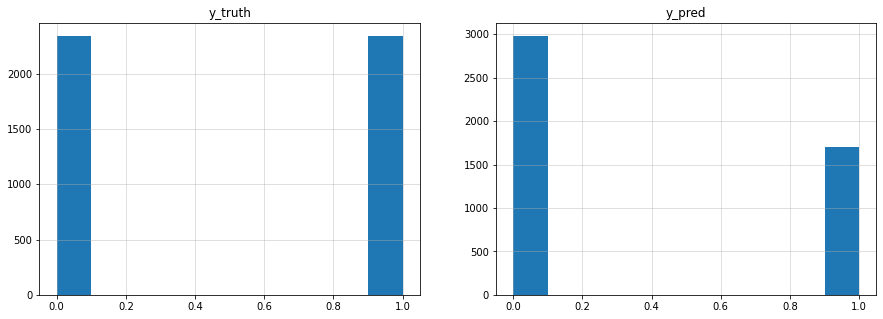

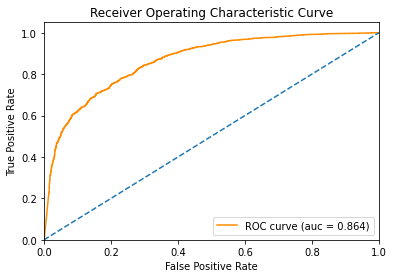

In [6]:
print_pred('data/pt_simple_1gd/realxy.h5')

fake x, fake y
We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 1.645, accuracy = 0.521
y_truth:  [0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
y_pred:  [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]


<Figure size 432x288 with 0 Axes>

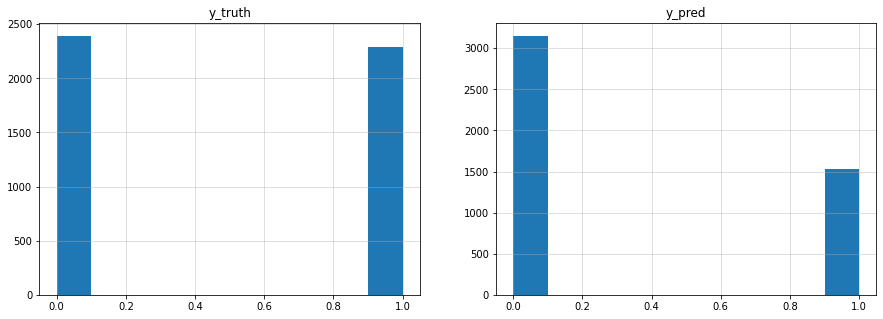

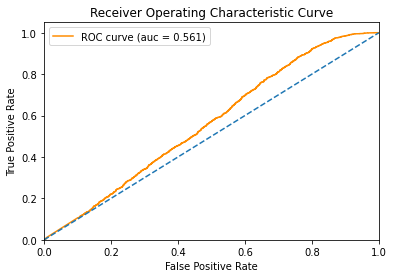

fake x, real y
We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 1.837, accuracy = 0.737
y_truth:  [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
y_pred:  [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]


<Figure size 432x288 with 0 Axes>

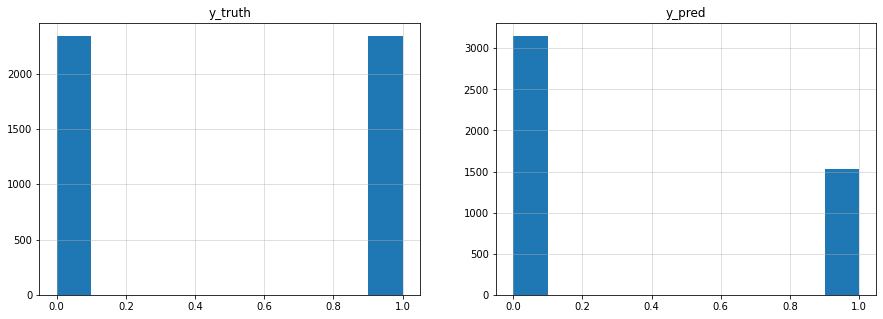

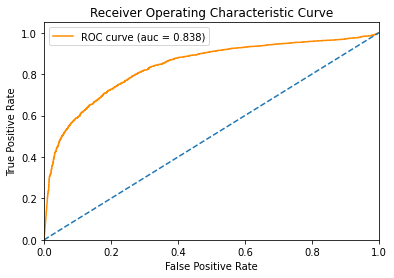

In [5]:
print('fake x, fake y')
print_pred('data/pt_simple_1gd/fakexy.h5')
print('fake x, real y')
print_pred('data/pt_simple_1gd/fakex_realy.h5')

fake x, fake y
We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 1.817, accuracy = 0.547
y_truth:  [0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
y_pred:  [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

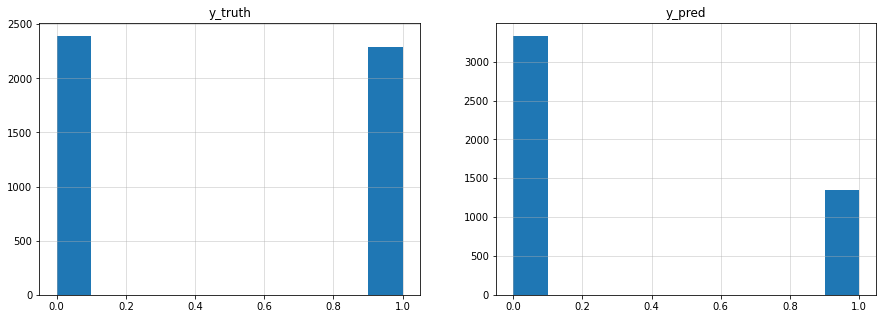

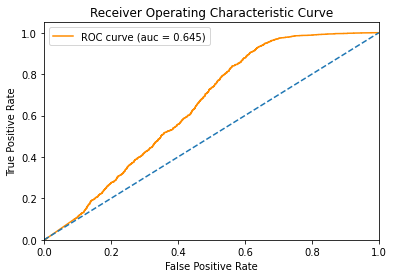

fake x, real y
We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 4.721, accuracy = 0.708
y_truth:  [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
y_pred:  [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

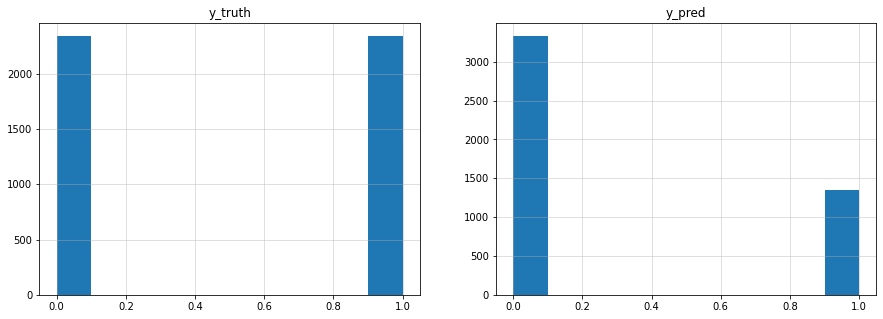

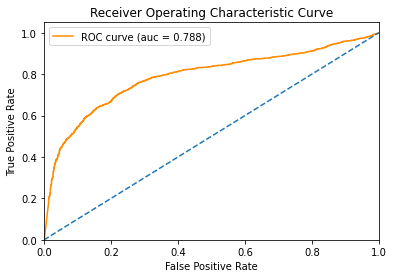

In [6]:
print('fake x, fake y')
print_pred('data/pt_simple_5gd/fakexy.h5')
print('fake x, real y')
print_pred('data/pt_simple_5gd/fakex_realy.h5')

fake x, fake y
We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 1.22, accuracy = 0.597
y_truth:  [0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
y_pred:  [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

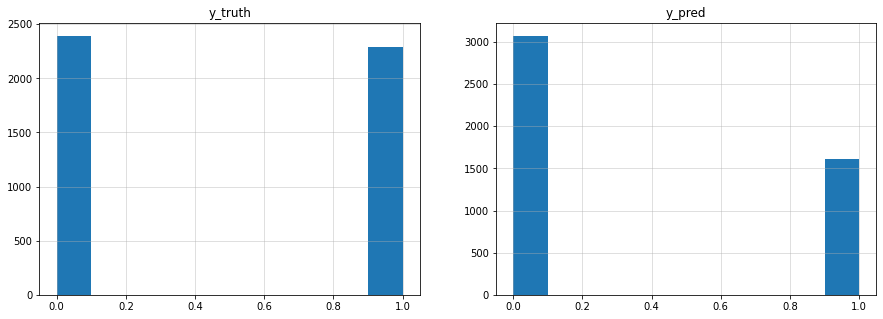

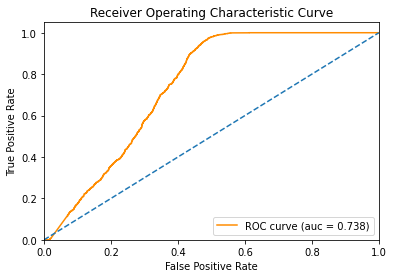

fake x, real y
We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 4.474, accuracy = 0.67
y_truth:  [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
y_pred:  [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

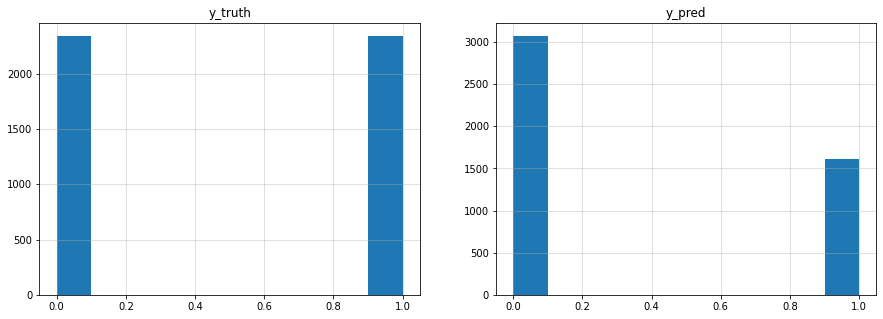

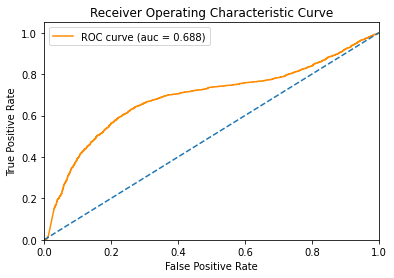

In [7]:
print('fake x, fake y')
print_pred('data/pt_complex_5gd/fakexy.h5')
print('fake x, real y')
print_pred('data/pt_complex_5gd/fakex_realy.h5')